Lab prgm 1 - Find S algorithm

In [ ]:
import pandas as pd

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/paramesha-k/data/master/EnjoySport.csv", header=None)
print(data)

number_of_attributes=len(data.columns)-1

hypothesis=['0']*number_of_attributes

print("H-0:",hypothesis)

for index, row in data.iterrows():
  if row[len(row)-1]== 'No':
    for colIndex in range(len(row)-1):
      if hypothesis[colIndex]=='0':
        hypothesis[colIndex]=row[colIndex]
      elif hypothesis[colIndex] != row[colIndex]:
        hypothesis[colIndex]='?'
      else:
        pass
    print("H-",str(index+1),":",hypothesis)   

print("S:",hypothesis)    

       0     1       2       3     4       5    6
0  Sunny  Warm  Normal  Strong  Warm    Same  Yes
1  Sunny  Warm    High  Strong  Warm    Same  Yes
2  Rainy  Cold    High  Strong  Warm  Change   No
3  Sunny  Warm    High  Strong  Cool  Change  Yes
H-0: ['0', '0', '0', '0', '0', '0']
H- 3 : ['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change']
S: ['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change']


Lab program -2 Candidate elimination

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/paramesha-k/data/master/EconomyCar.csv", header=None)


number_of_attributes=len(data.columns)-1

S=[list('0'*number_of_attributes)]
G=[list('?'*number_of_attributes)]

print(S)
print(G)

def consistancy_of_G(instance,hypothesisSet):
  newG=[]
  print("instance:",instance)
  for h in hypothesisSet:
    print("h consistancy:",h)
    consistant=True
    for ind in range(len(h)):
      if h[ind]=='?':
        continue
      if h[ind]!=instance[ind]:
        consistant=False
        #print(h[ind],":",instance[ind])
        break
    if consistant==True:
      newG.append(h)
      print("neWG consistancy:", newG)
  
  return newG


def consistancy_of_S(instance,hypothesisSet):
  newS=[]
  for h in hypothesisSet:
    consistant=False
    for ind in range(len(h)):
      if h[ind]=='0':
        continue
      if h[ind]!=instance[ind]:
        consistant=True
        break
    if consistant==True:
      newS.append(h)
  return newS

for index, row in data.iterrows():
  
  if row[len(row)-1] == 'Yes':
    G=consistancy_of_G(row, G)
    print("afterconsistency",G)
    for ind in range(len(S[0])):
      if S[0][ind]=='0':
        S[0][ind]=row[ind]
      elif S[0][ind] != row[ind]:
        S[0][ind]='?'
      else:
        pass
  else:
    S=consistancy_of_S(row,S)
    newG=list()
    more_General=list()
    for ind in range(number_of_attributes):
      for h in G:
       newh=list(h)
       print("h:",h,len(G))
       if h[ind]=='?':
         if row[ind]!=S[0][ind]:
           newh[ind]=S[0][ind]
           newG.append(newh)
           more_General.append(h) 
           
      
      #print("addnew",newG)
    generalHypothesisRemovalList=list()
#    for generalhypothesis in more_General:
#      for nextSpecializationHypothesis in newG:
#        if generalhypothesis==nextSpecializationHypothesis:
#          print("same list")
#          generalHypothesisRemovalList.append(nextSpecializationHypothesis)
    print("moreGeneralList:",more_General)
    print("newList:",newG)
#    print("generalHypothesisRemovalList:",generalHypothesisRemovalList)
    for generalhypothesis in more_General:
      if generalhypothesis in newG:
        print("present")
        newG.remove(generalhypothesis)

    G=newG
  print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^VERSION SPACE^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
  print(row)
  print(S)
  print(G)
  print("--------------------------------------------------------------------------------------------")

[['0', '0', '0', '0', '0']]
[['?', '?', '?', '?', '?']]
instance: 0     Japan 
1      Honda
2      Blue 
3       1980
4    Economy
5        Yes
Name: 0, dtype: object
h consistancy: ['?', '?', '?', '?', '?']
neWG consistancy: [['?', '?', '?', '?', '?']]
afterconsistency [['?', '?', '?', '?', '?']]
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^VERSION SPACE^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
0     Japan 
1      Honda
2      Blue 
3       1980
4    Economy
5        Yes
Name: 0, dtype: object
[['Japan ', 'Honda', 'Blue ', 1980, 'Economy']]
[['?', '?', '?', '?', '?']]
--------------------------------------------------------------------------------------------
h: ['?', '?', '?', '?', '?'] 1
h: ['?', '?', '?', '?', '?'] 1
h: ['?', '?', '?', '?', '?'] 1
h: ['?', '?', '?', '?', '?'] 1
h: ['?', '?', '?', '?', '?'] 1
moreGeneralList: [['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?']]
newList: [['?', 'Honda', '?', '?', '?'], ['?

Lab program - 3 ID3

In [ ]:
import pandas as pd

In [5]:
from pandas import DataFrame

df_tennis = pd.read_csv(r"https://raw.githubusercontent.com/paramesha-k/data/master/tennis.csv")
df_tennis 


# In[6]:


def entropy(probs): 
    import math 
    return sum( [-prob*math.log(prob, 2) for prob in probs] )

def entropy_of_list(a_list): 
    from collections import Counter     
    cnt = Counter(x for x in a_list) 
    print("No and Yes Classes:",a_list.name,cnt)     
    num_instances = len(a_list)*1.0     
    probs = [x / num_instances for x in cnt.values()]     
    return entropy(probs) # Call Entropy:

total_entropy = entropy_of_list(df_tennis['PlayTennis']) 
print("Entropy of given PlayTennis Data Set:",total_entropy) 


# In[11]:


def information_gain(df, split_attribute_name, target_attribute_name, trace=0): 
    print("&&&&&&&&&")
    for name,group in df_split:         
        print(name)         
        print(group) 


# In[13]:


def information_gain(df, split_attribute_name, target_attribute_name, trace=0): 
    df_split = df.groupby(split_attribute_name)
    print("splitttttttttttttttttttt")
    print(split_attribute_name)
    print("******************")
    for name,group in df_split:         
        print("Name:",name)
        print("Group:",group)
    print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
    nobs = len(df.index) * 1.0
    df_agg_ent = df_split.agg({target_attribute_name : [entropy_of_list, lambda x: len(x)/nobs] })[target_attribute_name] 
    df_agg_ent.columns = ['Entropy', 'PropObservations'] 
    new_entropy = sum(df_agg_ent['Entropy'] * df_agg_ent['PropObservations'] )
    old_entropy = entropy_of_list(df[target_attribute_name]) 
    return old_entropy - new_entropy


# In[18]:


print('Info-gain for Outlook is :'+str( information_gain(df_tennis, 'Outlook', 'PlayTennis')),"\n") 
print('\n Info-gain for Humidity is: ' + str( information_gain(df_tennis, 'Humidity', 'PlayTennis')),"\n") 
print('\n Info-gain for Wind is:' + str( information_gain(df_tennis, 'Windy', 'PlayTennis')),"\n")
print('\n Info-gain for Temperature is:' + str( information_gain(df_tennis , 'Temperature','PlayTennis')),"\n") 


# In[21]:


def id3(df, target_attribute_name, attribute_names, default_class=None):
    from collections import Counter     
    cnt = Counter(x for x in df[target_attribute_name])
    if len(cnt) == 1:         
        return next(iter(cnt)) 
    elif df.empty or (not attribute_names): 
             return default_class 
    else:
        gainz = [information_gain(df, attr, target_attribute_name) for attr in attribute_names]
        print("ATTRIBUTE NAME:",attribute_names)
        index_of_max = gainz.index(max(gainz)) 
        best_attr = attribute_names[index_of_max] 
        tree = {best_attr:{}}
        remaining_attribute_names = [i for i in attribute_names if i != best_attr]
        for attr_val, data_subset in df.groupby(best_attr): 
            subtree = id3(data_subset,
                          target_attribute_name,                         
                          remaining_attribute_names,                         
                          default_class)
            tree[best_attr][attr_val] = subtree 
        return tree
     
        


# In[22]:


attribute_names = list(df_tennis.columns)
print("List of Attributes:", attribute_names) 
attribute_names.remove('PlayTennis') 
print("Predicting Attributes:", attribute_names)


# In[23]:


from pprint import pprint 
tree = id3(df_tennis,'PlayTennis',attribute_names)
print("\n\nThe Resultant Decision Tree is :\n") 
pprint(tree) 

No and Yes Classes: PlayTennis Counter({'Yes': 9, 'No': 5})
Entropy of given PlayTennis Data Set: 0.9402859586706309
splitttttttttttttttttttt
Outlook
******************
Name: Overcast
Group:      Outlook Temperature Humidity  Windy PlayTennis
2   Overcast         Hot     High  False        Yes
6   Overcast        Cool   Normal   True        Yes
11  Overcast        Mild     High   True        Yes
12  Overcast         Hot   Normal  False        Yes
Name: Rainy
Group:    Outlook Temperature Humidity  Windy PlayTennis
3    Rainy        Mild     High  False        Yes
4    Rainy        Cool   Normal  False        Yes
5    Rainy        Cool   Normal   True         No
9    Rainy        Mild   Normal  False        Yes
13   Rainy        Mild     High   True         No
Name: Sunny
Group:    Outlook Temperature Humidity  Windy PlayTennis
0    Sunny         Hot     High  False         No
1    Sunny         Hot     High   True         No
7    Sunny        Mild     High  False         No
8    Sunny 

Lab program - 4 Neural Network

In [7]:
import numpy as np

In [8]:
inputNeurons=2
hiddenlayerNeurons=2
outputNeurons=2

input  = np.random.randint(1,100,inputNeurons)
output = np.array([1.0,0.0])
hidden_layer=np.random.rand(1,hiddenlayerNeurons)

hidden_biass=np.random.rand(1,hiddenlayerNeurons)
output_bias=np.random.rand(1,outputNeurons)
hidden_weights=np.random.rand(inputNeurons,hiddenlayerNeurons)
output_weights=np.random.rand(hiddenlayerNeurons,outputNeurons)

def sigmoid (layer):
    return 1/(1 + np.exp(-layer))

def gradient(layer):
    return layer*(1-layer)

for i in range(2000):

    hidden_layer=np.dot(input,hidden_weights)
    hidden_layer=sigmoid(hidden_layer+hidden_biass)

    output_layer=np.dot(hidden_layer,output_weights)
    output_layer=sigmoid(output_layer+output_bias)

    error = (output-output_layer)
    gradient_outputLayer=gradient(output_layer)

    error_terms_output=gradient_outputLayer * error

    error_terms_hidden=gradient(hidden_layer)*np.dot(error_terms_output,output_weights.T)

    gradient_hidden_weights = np.dot(input.reshape(inputNeurons,1),error_terms_hidden.reshape(1,hiddenlayerNeurons))
    gradient_ouput_weights = np.dot(hidden_layer.reshape(hiddenlayerNeurons,1),error_terms_output.reshape(1,outputNeurons))

    hidden_weights = hidden_weights + 0.05*gradient_hidden_weights
    output_weights = output_weights + 0.05*gradient_ouput_weights
    print("**********************")
    print("iteration:",i,"::::",error)
    print("#####output######",output_layer)

Streaming output truncated to the last 5000 lines.
iteration: 333 :::: [[ 0.08763659 -0.22142798]]
#####output###### [[0.91236341 0.22142798]]
**********************
iteration: 334 :::: [[ 0.08758058 -0.22077057]]
#####output###### [[0.91241942 0.22077057]]
**********************
iteration: 335 :::: [[ 0.08752467 -0.2201179 ]]
#####output###### [[0.91247533 0.2201179 ]]
**********************
iteration: 336 :::: [[ 0.08746886 -0.21946992]]
#####output###### [[0.91253114 0.21946992]]
**********************
iteration: 337 :::: [[ 0.08741315 -0.21882657]]
#####output###### [[0.91258685 0.21882657]]
**********************
iteration: 338 :::: [[ 0.08735754 -0.21818781]]
#####output###### [[0.91264246 0.21818781]]
**********************
iteration: 339 :::: [[ 0.08730203 -0.21755359]]
#####output###### [[0.91269797 0.21755359]]
**********************
iteration: 340 :::: [[ 0.08724662 -0.21692386]]
#####output###### [[0.91275338 0.21692386]]
**********************
iteration: 341 :::: [[ 0.0871

Lab program - 5 Naivebayes

In [9]:
import pandas as pd
from pandas import DataFrame

df_golf = pd.read_csv(r"https://raw.githubusercontent.com/paramesha-k/Machine-Learning-15CSL76-LAB/master/golf.csv")
print(df_golf)

attribute_names = list(df_golf.columns)
print("List of Attributes:", attribute_names)
attribute_names.remove('label')
print("Predicting Attributes:", attribute_names)
table=dict()
priorProb=dict()


train=df_golf.sample(frac=0.8,random_state=100) #random state is a seed value
test=df_golf.drop(train.index)

print("ddddddddddddddddddddddddddddddd")
print(train)
print("dddddddddddddddddddddddddddddddd")
print(test)
print("dddddddddddddddddddddddd")


for attr_val, data_subset in train.groupby("label"):
    from collections import Counter
    valueCount = dict()
    count=0
    for attr_value in attribute_names:
        cnt = Counter(x for x in data_subset[attr_value])
        count=sum(cnt.values())
        valueCount[attr_value]=dict(cnt)
        print("value count", valueCount.values())
        print("counter:-",cnt)

    table[attr_val]=valueCount
    priorProb[attr_val]=count
print("*******************************************")
from pprint import pprint

print("\n\nThe Resultant table is :\n")
pprint(table)
pprint(priorProb)

totalSize=test['label'].count()
correctPridictions=0
for k, row in test.iterrows():

    rowTuple=dict(row)
    print("print row tuple")
    pprint(rowTuple)
    postioriList=list()
    labelList=list()
    for label in table.keys():
        posteriori = 1.0
        print("RowTuple",rowTuple.keys())
        print("RowValues",rowTuple.values())
        for key in [x for x in rowTuple.keys() if x != 'label']:
            print(key, "label:",label)
            attributeValue=rowTuple.get(key)
            if attributeValue in table[label][key].keys():
                countList=table[label][key].values()
                #print("CountList:", countList)
                attributeCount=table[label][key][attributeValue]
                #print("CountList:",countList)
                #print("SumCountList",sum(countList))
                #print("AttributeCount:",attributeCount)
                #print("key:valuepair",key,":",rowTuple[key])
                posteriori=1.0*attributeCount/sum(countList)*posteriori

        posteriori=posteriori*priorProb[label]
        labelList.append(label)
        postioriList.append(posteriori)
        print(labelList)
        print(postioriList)
    maxProbInd = postioriList.index(max(postioriList))
    print(rowTuple['label'], "::::", labelList[maxProbInd])
    if rowTuple['label'] == labelList[maxProbInd]:
        print(rowTuple['label'],"::::",labelList[maxProbInd])
        correctPridictions=correctPridictions+1
        print("POSTERIORI OF:",label,"is:",posteriori)
print("Number of Correct Predictions : Number of Samples",correctPridictions,":",totalSize)
print("Accuracy:",100.0*correctPridictions/totalSize)

    id     outlook    temp  humidity      wind  label
0    1     'Sunny'   'Hot'    'High'    'Weak'   'No'
1    2     'Sunny'   'Hot'    'High'  'Strong'   'No'
2    3  'Overcast'   'Hot'    'High'    'Weak'  'Yes'
3    4      'Rain'  'Mild'    'High'    'Weak'  'Yes'
4    5      'Rain'  'Cool'  'Normal'    'Weak'  'Yes'
5    6      'Rain'  'Cool'  'Normal'  'Strong'   'No'
6    7  'Overcast'  'Cool'  'Normal'  'Strong'  'Yes'
7    8     'Sunny'  'Mild'    'High'    'Weak'   'No'
8    9     'Sunny'  'Cool'  'Normal'    'Weak'  'Yes'
9   10      'Rain'  'Mild'  'Normal'    'Weak'  'Yes'
10  11     'Sunny'  'Mild'  'Normal'  'Strong'  'Yes'
11  12  'Overcast'  'Mild'    'High'  'Strong'  'Yes'
12  13  'Overcast'   'Hot'  'Normal'    'Weak'  'Yes'
13  14      'Rain'  'Mild'    'High'  'Strong'   'No'
List of Attributes: ['id', 'outlook', 'temp', 'humidity', 'wind', 'label']
Predicting Attributes: ['id', 'outlook', 'temp', 'humidity', 'wind']
ddddddddddddddddddddddddddddddd
    id     out

Lab program - 6 Naivebayes(2)

In [10]:
import pandas as pd
from pandas import DataFrame

df_imbd = pd.read_csv(r"https://raw.githubusercontent.com/paramesha-k/Machine-Learning-15CSL76-LAB/master/imdb_labelled.txt",sep='\t',index_col=None)

print(df_imbd.keys())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_imbd['Text'], df_imbd['Label'],train_size=0.8,random_state=100)

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True, stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

word_freq_df = pd.DataFrame(X_train_cv.toarray(), columns=cv.get_feature_names())
top_words_df = pd.DataFrame(word_freq_df.sum()).sort_values(0, ascending=False)

from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()

naive_bayes.fit(X_train_cv, y_train)
predictions = naive_bayes.predict(X_test_cv)

from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy score: ', accuracy_score(y_test, predictions))
print('Precision score: ', precision_score(y_test, predictions))
print('Recall score: ', recall_score(y_test, predictions))

#print(word_freq_df)
#print(top_words_df)

Index(['Text', 'Label'], dtype='object')
Accuracy score:  0.8133333333333334
Precision score:  0.7763157894736842
Recall score:  0.8428571428571429


In [11]:
!pip install pgmpy

     |████████████████████████████████| 327kB 7.1MB/s 


Lab program - 7 Bayesian Network

In [12]:
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator,BayesianEstimator
from pgmpy.estimators import PC

data = pd.read_csv("https://raw.githubusercontent.com/paramesha-k/data/master/heart.csv",sep=',')
data.head(6)

c=PC(data)
structure=c.estimate()
print(structure.edges())

model=BayesianModel(structure.edges())

model.fit(data,estimator=MaximumLikelihoodEstimator)

from pgmpy.inference import VariableElimination
infer=VariableElimination(model)
q=infer.query(variables=['cp','target'],evidence={'sex':0,'exang':1})
print(q)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Eliminating: chol: 100%|██████████| 4/4 [00:00<00:00, 261.15it/s]

[('ca', 'target'), ('exang', 'target'), ('thal', 'target'), ('cp', 'target'), ('cp', 'exang'), ('sex', 'thal'), ('oldpeak', 'chol')]
+-----------+-------+------------------+
| target    | cp    |   phi(target,cp) |
+===========+=======+==================+
| target(0) | cp(0) |           0.5586 |
+-----------+-------+------------------+
| target(0) | cp(1) |           0.0070 |
+-----------+-------+------------------+
| target(0) | cp(2) |           0.0309 |
+-----------+-------+------------------+
| target(0) | cp(3) |           0.0070 |
+-----------+-------+------------------+
| target(1) | cp(0) |           0.2495 |
+-----------+-------+------------------+
| target(1) | cp(1) |           0.0334 |
+-----------+-------+------------------+
| target(1) | cp(2) |           0.0802 |
+-----------+-------+------------------+
| target(1) | cp(3) |           0.0334 |
+-----------+-------+------------------+


Lab program - 8 EM algorithm

In [16]:
# -----Kmeans----
from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target)
model =KMeans(n_clusters=3)
model.fit(X_train,y_train)
metrics.accuracy_score(y_test,model.predict(X_test))

0.3684210526315789

In [15]:
#-------Expectation and Maximization----------
from sklearn.mixture import GaussianMixture
model2 = GaussianMixture(n_components=3)
model2.fit(X_train,y_train)
model2.score
metrics.accuracy_score(y_test,model2.predict(X_test))

0.39473684210526316

Lab program - 9 k-nearest

In [17]:
import pandas as pd
from pandas import DataFrame

df_irisbd = pd.read_csv(r"https://raw.githubusercontent.com/paramesha-k/Machine-Learning-15CSL76-LAB/master/iris.data",header=None,index_col=None)
print(df_irisbd)
X = df_irisbd.iloc[:, :-1].values
y = df_irisbd.iloc[:, 4].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=100)
print(y_test)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(X_train,y_train)

predicted= model.predict(X_test) # 0:Overcast, 2:Mild
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]
['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']
[[11

Lab program - 10 locally weighted regression

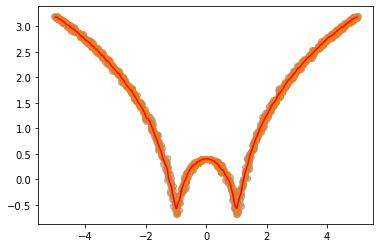

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 1000)
y = np.log(np.abs((x ** 2) - 1) + 0.5)
x = x + np.random.normal(scale=0.05, size=1000)
plt.scatter(x, y, alpha=0.3)


def local_regression(x0, x, y, tau):
    x0 = np.r_[1, x0]
    x = np.c_[np.ones(len(x)), x]
    xw = x.T * radial_kernel(x0, x, tau)
    beta = np.linalg.pinv(xw @ x) @ xw @ y
    return x0 @ beta


def radial_kernel(x0, x, tau):
    return np.exp(np.sum((x - x0) ** 2, axis=1) / (-2 * tau ** 2))


def plot_lr(tau):
    domain = np.linspace(-5, 5, num=300)
    pred = [local_regression(x0, x, y, tau) for x0 in domain]
    plt.scatter(x, y, alpha=0.3)
    plt.plot(domain, pred, color="red")
    return plt


plot_lr(0.03).show()